<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Feature Selection, Model Selection and Tuning: Credit Card Users Churn Prediction</center></h1>
<h4><center>Author: Enrique Martin Sanchez</center></h4>

# Description
## Background and Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

## Objective

1. Explore and visualize the dataset.
2. Build a classification model to predict if the customer is going to churn or not
3. Optimize the model using appropriate techniques
4. Generate a set of insights and recommendations that will help the bank

## Data Dictionary

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - * Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import _tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

%matplotlib inline

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings('ignore')

# Support Functions

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = "{:,.0f}".format(
                p.get_height()
              )  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot an scatterplot and a lineplot at the same time

def scatter_lineplot(data, feature_x, feature_y, figsize=(12, 7)):
  """
  Boxplot and scatter and lineplot combined

  data: dataframe
  feature_x: dataframe column in x axis
  feature_y: dataframe column in y axis
  figsize: size of figure (default (12,7))
  """
  
  f2, (ax_scatter, ax_line) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.5, 0.5)},
        figsize=figsize,
  ) # creating the 2 subplots
  sns.scatterplot(
      data=data, x=feature_x, y=feature_y, ax=ax_scatter, color="orange"
  ).set_title(feature_x + ' vs ' + feature_y)
  sns.lineplot(
      data=data,  x=feature_x, y=feature_y, ax=ax_line, color="blue", ci=None
  ) 
  

In [ ]:
# function to treat outliers

def treat_outliers(df, col, test=False):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th percentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    if test == True:
      X_test[col] = np.clip(X_test[col], lower_whisker, upper_whisker)

    return df

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, model_name, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining empty lists to store train and test results
    score_list_train=[] 
    score_list_test=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    #Recall of the model
    train_recall = recall_score(y_train, pred_train)
    test_recall = recall_score(y_test, pred_test)
    
    #Precision of the model
    train_precision = precision_score(y_train, pred_train)
    test_precision = precision_score(y_test, pred_test)
    
    #F1 of the model
    train_f1 = f1_score(y_train, pred_train)
    test_f1 = f1_score(y_test, pred_test)
    
    score_list_train.extend((model_name, train_acc, train_recall, train_precision, train_f1))
    score_list_test.extend((model_name, test_acc, test_recall, test_precision, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. 
    # The default value is set to True.
    if flag == True: 
        print("----- Train scores -----")
        print("Accuracy on training set : ",model.score(X_train, y_train))
        print("Recall on training set : ",recall_score(y_train, pred_train))
        print("Precision on training set : ",precision_score(y_train, pred_train))
        print("F1 on training set : ", f1_score(y_train, pred_train))
        print("----- Test scores -----")
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on test set : ",recall_score(y_test,pred_test))
        print("Precision on test set : ",precision_score(y_test,pred_test))
        print("F1 on test set : ", f1_score(y_test, pred_test))
    
    return score_list_train, score_list_test # returning the lists with train and test scores

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target, name):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Model": name, "Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, y_predict, title, labels=[1, 0]):
    
    cm = confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (6,4))
    sns.heatmap(df_cm, annot=labels,fmt='', cbar=False).set_title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# EDA - Exploratoruy data anlyisis

## Understanding the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Courses/AIML University of Texas/5. Feature Selection, Model Selection and Tuning/Project 5: Credit Card Users Churn Prediction/BankChurners.csv')
df = data.copy()

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,"12,691.0000",777,"11,914.0000",1.3350,1144,42,1.6250,0.0610
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,"8,256.0000",864,"7,392.0000",1.5410,1291,33,3.7140,0.1050
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,"3,418.0000",0,"3,418.0000",2.5940,1887,20,2.3330,0.0000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,"3,313.0000",2517,796.0000,1.4050,1171,20,2.3330,0.7600
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,"4,716.0000",0,"4,716.0000",2.1750,816,28,2.5000,0.0000


In [ ]:
df.shape

(10127, 21)

**Insights**
- There are 21 columns and 10127 rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Insights**
- There are 15 numerical variables and 6 object ones
- Attrition_Flag (our tartget variable) is an object variable

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,"10,127.0000","739,177,606.3337","36,903,783.4502","708,082,083.0000","713,036,770.5000","717,926,358.0000","773,143,533.0000","828,343,083.0000"
Customer_Age,"10,127.0000",46.3260,8.0168,26.0000,41.0000,46.0000,52.0000,73.0000
Dependent_count,"10,127.0000",2.3462,1.2989,0.0000,1.0000,2.0000,3.0000,5.0000
Months_on_book,"10,127.0000",35.9284,7.9864,13.0000,31.0000,36.0000,40.0000,56.0000
Total_Relationship_Count,"10,127.0000",3.8126,1.5544,1.0000,3.0000,4.0000,5.0000,6.0000
Months_Inactive_12_mon,"10,127.0000",2.3412,1.0106,0.0000,2.0000,2.0000,3.0000,6.0000
Contacts_Count_12_mon,"10,127.0000",2.4553,1.1062,0.0000,2.0000,2.0000,3.0000,6.0000
Credit_Limit,"10,127.0000","8,631.9537","9,088.7767","1,438.3000","2,555.0000","4,549.0000","11,067.5000","34,516.0000"
Total_Revolving_Bal,"10,127.0000","1,162.8141",814.9873,0.0000,359.0000,"1,276.0000","1,784.0000","2,517.0000"
Avg_Open_To_Buy,"10,127.0000","7,469.1396","9,090.6853",3.0000,"1,324.5000","3,474.0000","9,859.0000","34,516.0000"


**Insights**
- CLIENTNUM seems to be an identifier of the row
- Customer_Age ranges from 26 to 73 years, might be some outliers
- Dependent_Count is a categorical variable ranges from 0 to 5
- Months_on_book ranges from 13 to 56, might be some outliers
- Total_Relationship_Count is a categorical variable ranges from 1 to 6
- Months_Inactive_12_mon is a categorical variable ranges from 0 to 6
- Contacts_Count_12_mon is a categorical variable ranges from 0 to 6
- Credit_Limit ranges from around 1,450 to 34,500 USD, there is right skewness
- Total_Revolving_Bal goes from 0 to around 2,500
- Avg_Open_To_Buy goes from 3 to around 34,500 (that min value seems suspicious)
- Total_Amt_Chng_Q4_Q1 ranges from 0 to 3.4
- Total_Trans_Amt ranges from around 500 to 18,000, there is right skewness
- Total_Trans_Ct ranges from 10 to 139
- Total_Ct_Chng_Q4_Q1 ranges from 0 to 3.71
- Avg_Utilization_Ratio ranges from 0 to 1


## Univarite analysis

### CLIENTNUM

In [ ]:
df.CLIENTNUM.nunique()

10127

**Insights**
- There are 10,127 unique values, it is a unique identifier

### Attrition_Flag - Target variable

In [ ]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
df.Attrition_Flag.value_counts(normalize=True)

Existing Customer   0.8393
Attrited Customer   0.1607
Name: Attrition_Flag, dtype: float64

**Insights**
- We have data imbalance, 84% Existing Customer and 16% Attrited Customer
- We want to minimize the Attrited Customers

## Variable classification

In [ ]:
cat_cols = ['Gender','Education_Level','Marital_Status','Income_Category',
            'Card_Category','Dependent_count','Total_Relationship_Count',
            'Months_Inactive_12_mon','Contacts_Count_12_mon']
num_cols = ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal',
            'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [ ]:
len(cat_cols), len(num_cols)

(9, 9)

## Numerical columns

### Customer_Age

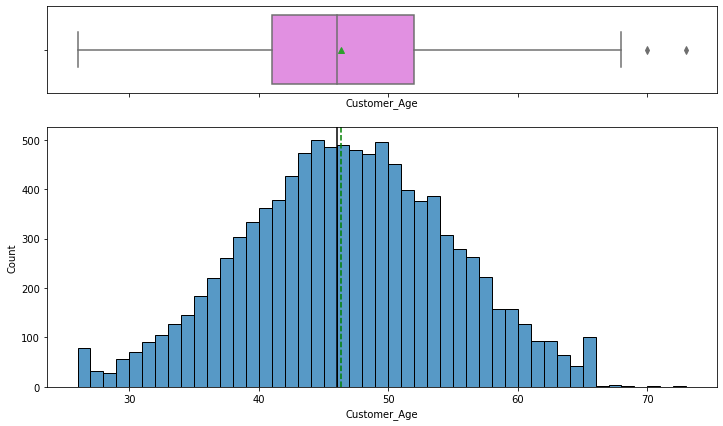

In [ ]:
histogram_boxplot(data=df, feature='Customer_Age')

**Insights**
- There are a few outliers
- Distribution is close to normal

### Months_on_book

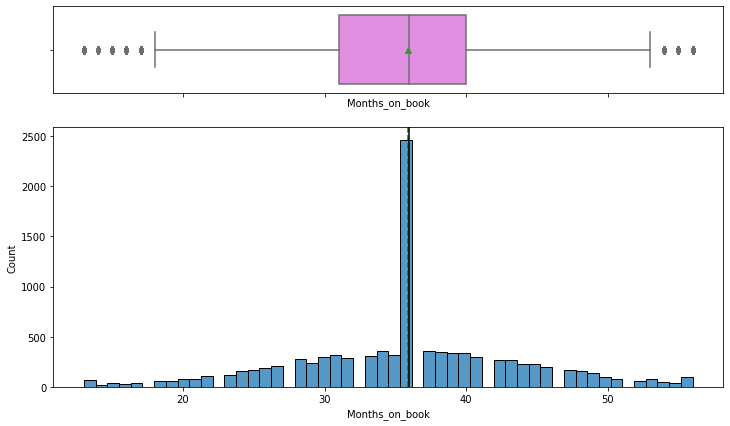

In [ ]:
histogram_boxplot(data=df, feature='Months_on_book')

In [ ]:
df.Months_on_book.value_counts(normalize=True)

36   0.2432
37   0.0354
34   0.0349
38   0.0343
39   0.0337
40   0.0329
31   0.0314
35   0.0313
33   0.0301
30   0.0296
41   0.0293
32   0.0285
28   0.0272
43   0.0270
42   0.0268
29   0.0238
44   0.0227
45   0.0224
27   0.0203
46   0.0195
26   0.0184
47   0.0169
25   0.0163
48   0.0160
24   0.0158
49   0.0139
23   0.0115
22   0.0104
56   0.0102
50   0.0095
21   0.0082
51   0.0079
53   0.0077
20   0.0073
13   0.0069
19   0.0062
52   0.0061
18   0.0057
54   0.0052
55   0.0041
17   0.0039
15   0.0034
16   0.0029
14   0.0016
Name: Months_on_book, dtype: float64

**Insights**
- 24% of clients have 36 years relation with the bank
- Next number of months is 37 with only 4%

### Credit_Limit

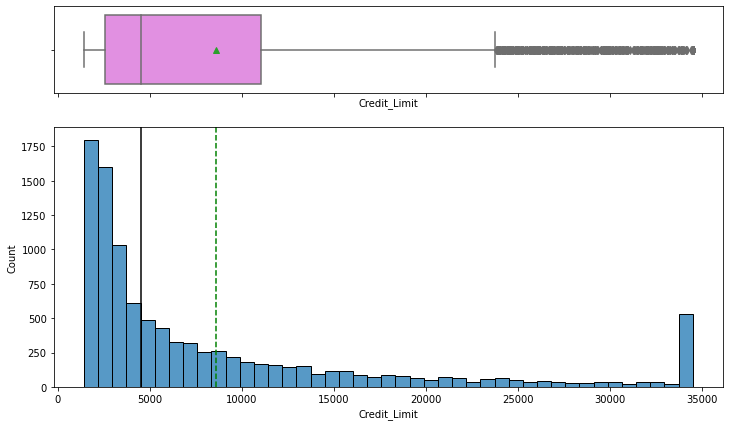

In [ ]:
histogram_boxplot(data=df, feature='Credit_Limit')

**Insights**
- There are a lot of outliers
- There is right skewness

### Total_Revolving_Bal

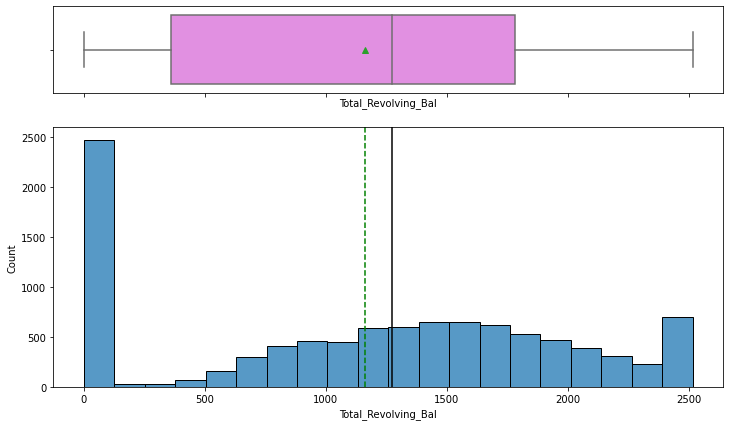

In [ ]:
histogram_boxplot(data=df, feature='Total_Revolving_Bal')

**Insights**
- Almost 2,500 clients does not carrie balance from one month to the other
- The rest is close to a normal distribution

### Avg_Open_To_Buy

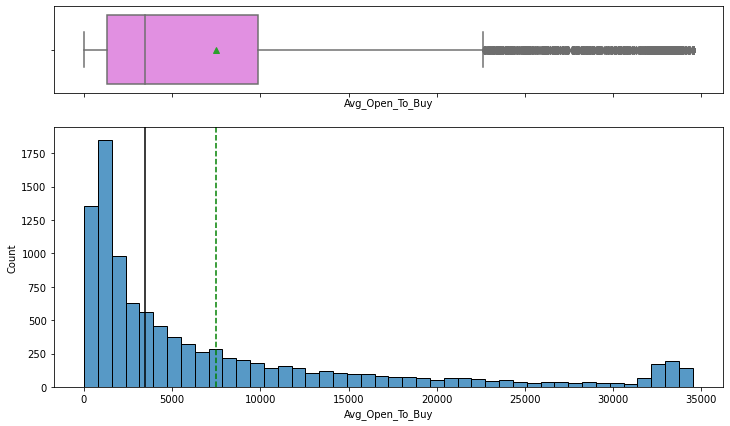

In [ ]:
histogram_boxplot(data=df, feature='Avg_Open_To_Buy')

**Insights**
- There are some outliers on the right side
- There is a heavy right skewness


### Total_Amt_Chng_Q4_Q1

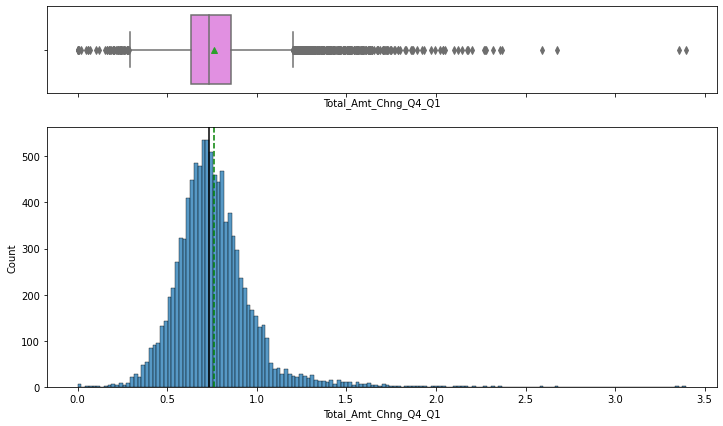

In [ ]:
histogram_boxplot(data=df, feature='Total_Amt_Chng_Q4_Q1')

**Insights**
- Outliers on both ends
- Distribution close to normal

### Total_Trans_Amt

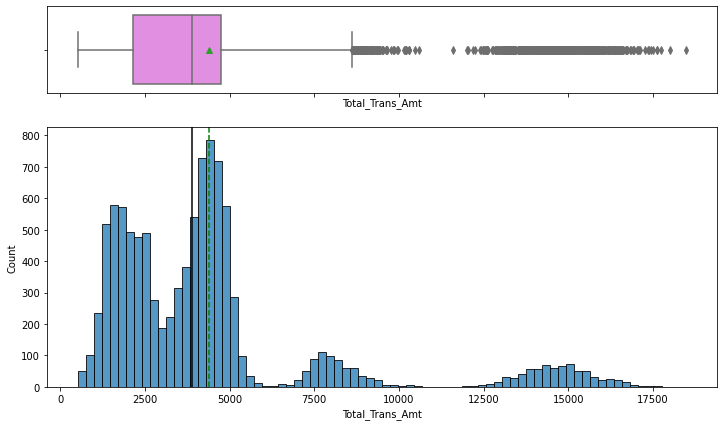

In [ ]:
histogram_boxplot(data=df, feature='Total_Trans_Amt')

**Insights**
- Outliers on the right end in 2 groups

### Total_Trans_Ct

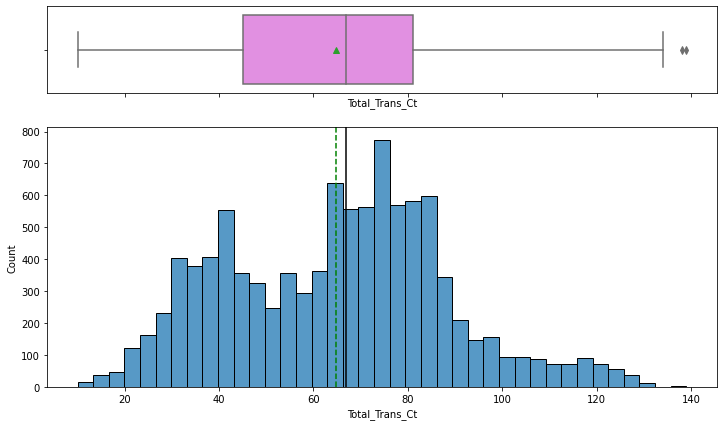

In [ ]:
histogram_boxplot(data=df, feature='Total_Trans_Ct')

**Insights**
- Close to a normal distribution

### Total_Ct_Chng_Q4_Q1

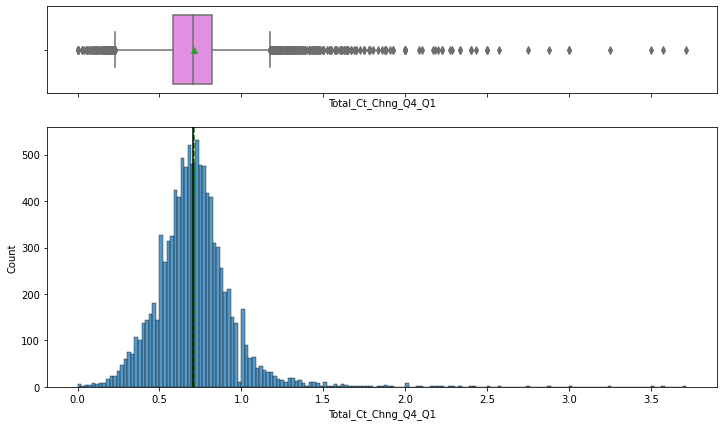

In [ ]:
histogram_boxplot(data=df, feature='Total_Ct_Chng_Q4_Q1')

**Insights**
- Outliers in both ends
- Close to a normal distribution

### Avg_Utilization_Ratio

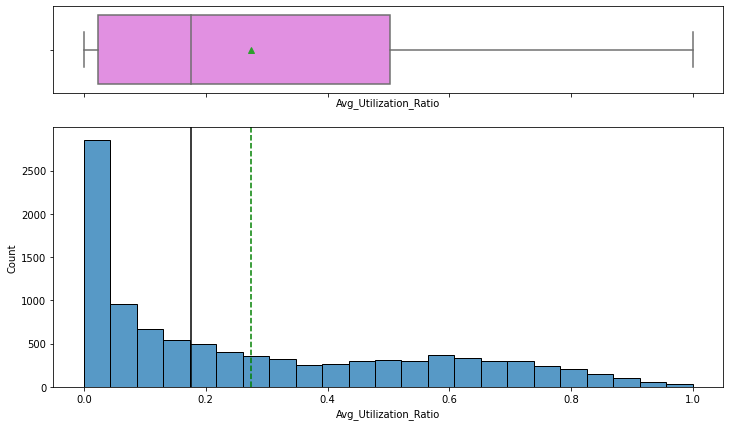

In [ ]:
histogram_boxplot(data=df, feature='Avg_Utilization_Ratio')

**Insights**
- Right skewness

## Categorical columns

### Gender

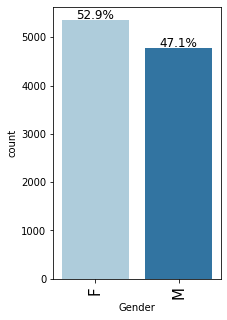

In [ ]:
labeled_barplot(data=df, feature='Gender', perc=True)

**Insights**
- 53% F
- 47% M

### Education_Level

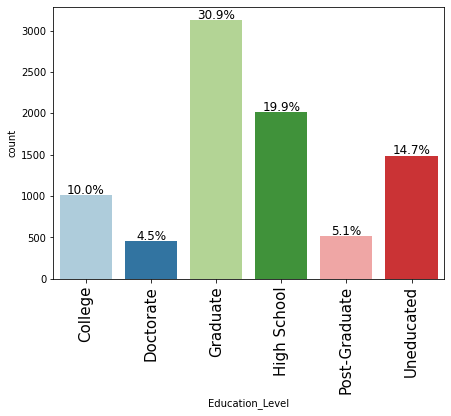

In [ ]:

labeled_barplot(data=df, feature='Education_Level', perc=True)

**Insights**
- 31% Graduates
- 20% High School
- only 4.5% Doctorates

### Marital_Status

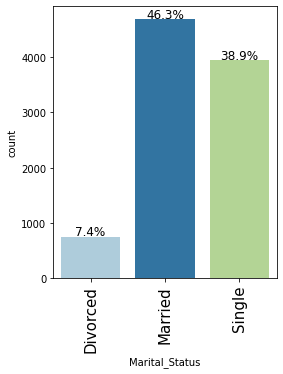

In [ ]:
labeled_barplot(data=df, feature='Marital_Status', perc=True)

**Insights**
- 46% Married
- 39% Single
- 7% Divorced

### Income_Category

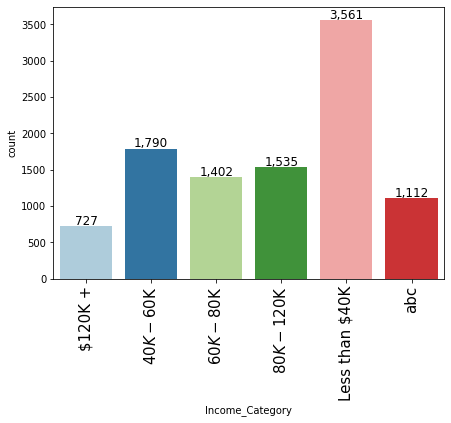

In [ ]:
labeled_barplot(data=df, feature='Income_Category')

**Insights**
- There is an abc category we will treat it later as a missing value

### Card_Category

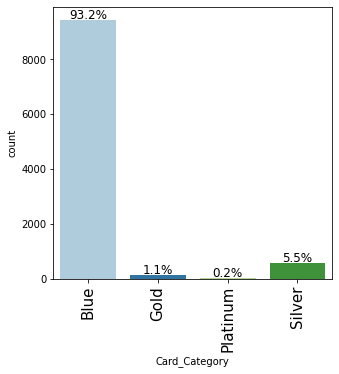

In [ ]:
labeled_barplot(data=df, feature='Card_Category', perc=True)

**Insights**
- 93% Blue Card
- Gold and platinum cards are almost 0
- Silver cards 5.5%

### Dependent_Count

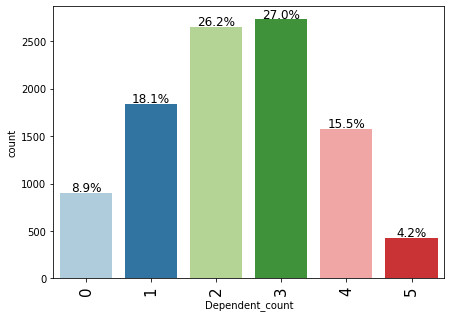

In [ ]:
labeled_barplot(data=df, feature='Dependent_count', perc=True)

**Insights**
- 3 and 2 dependents are the most common and 5 is the least

### Total_Relationship_Count

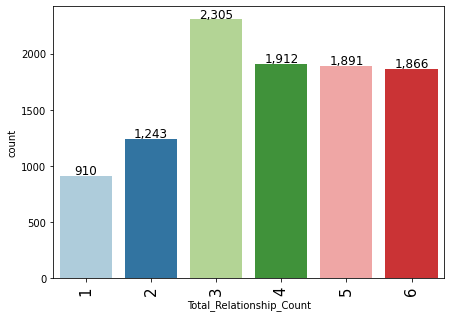

In [ ]:
labeled_barplot(data=df, feature='Total_Relationship_Count')

**Insights**
- 3 product per Customer is the most common
- 4, 5 and 6 products per customer are also frequent
- 1 is the least common one

### Months_Inactive_12_mon

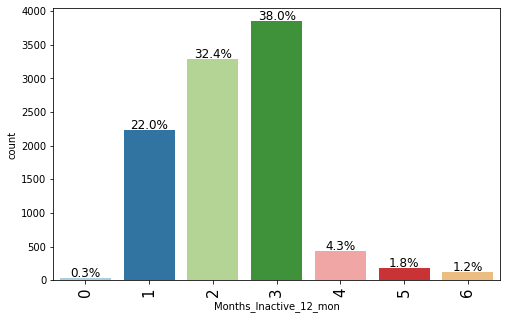

In [ ]:
labeled_barplot(data=df, feature='Months_Inactive_12_mon', perc=True)

**Insights**
- More than 90% have between 1 and 3 months of onactivity
- 3% have 5 or 6 months of inactivity

### Contacts_Count_12_mon

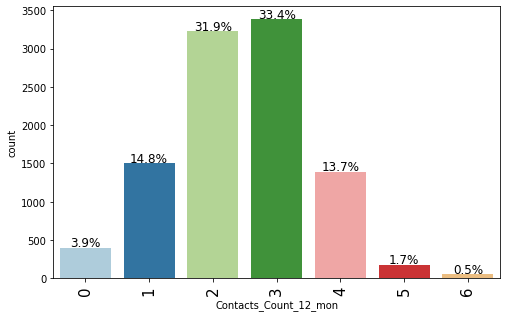

In [ ]:
labeled_barplot(data=df, feature='Contacts_Count_12_mon', perc=True)

**Insights**
- 33% of customers have have 3 contacts with the bank in the past 12 months
- 31.9% have had 2 contacts
- less than 2.5% have had 5 or 6
- 3.9% have not been in contact with the bank

## Bivariate analysis

In [ ]:
sns.pairplot(data=df, diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

**Insights**
- We can see some correlations, lets explore them further

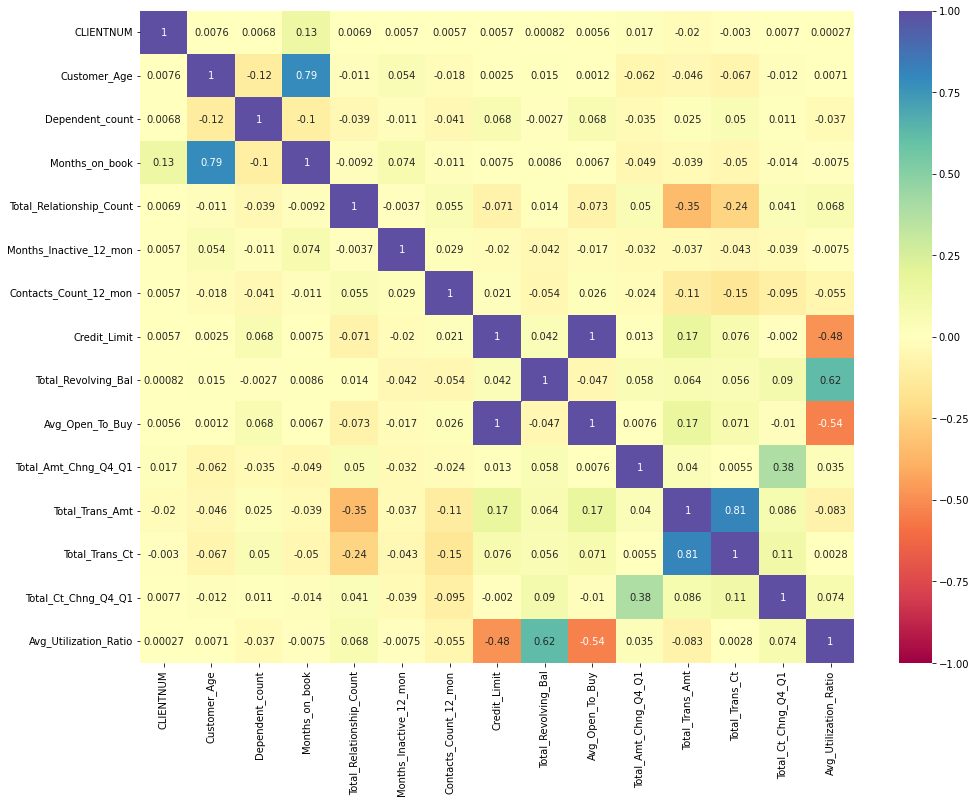

In [ ]:
fig = plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)

**Insights**
- Credit_Limit and Avg_Open_To_Buy are perfectly correlated
- Total_Trans_Amt and Total_Trans_Ct are highly correlated
- Months_on_book and Customer_Age are highly correlated
- Avg_Utilization_Ratio is somehow correlated with Credit_Limit, Total_Revolving_Bal and Avg_Open_To_Buy

## Target variable vs other features

### Target vs numerical features

### Customer_Age

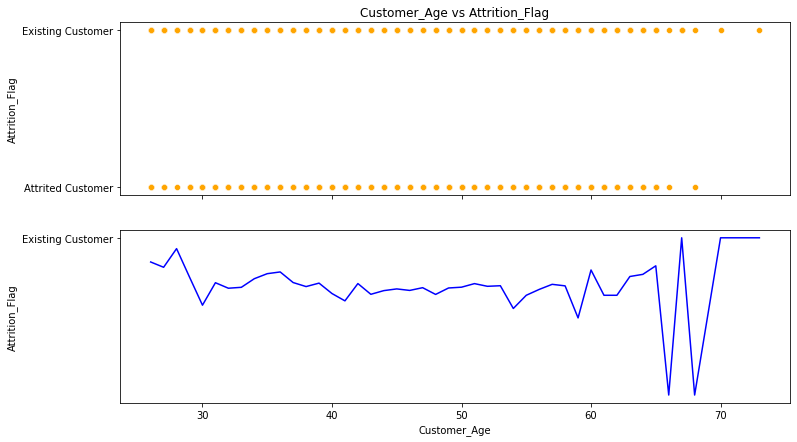

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Customer_Age')

**Insights**
- Customers of late 60s seem to be more willing to attrite
- No one after 70 have attrited

### Months_on_book

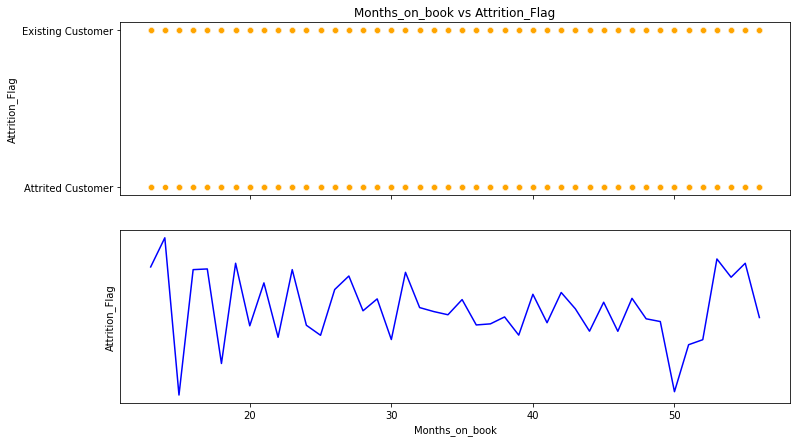

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Months_on_book')

**Insights**
- No clear correlation

### Credit_Limit

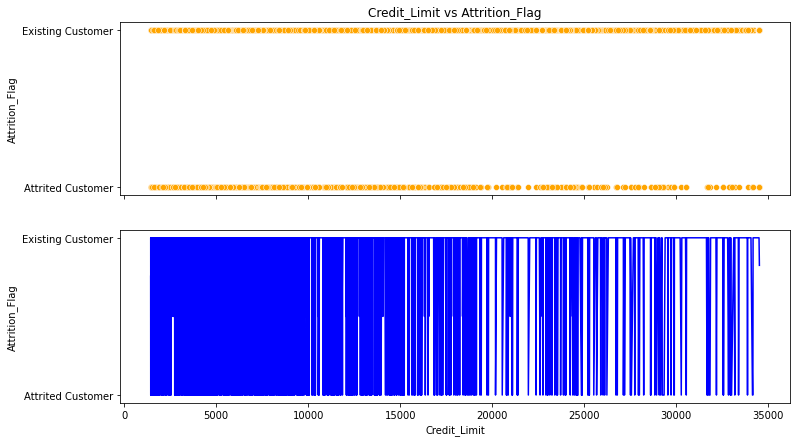

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Credit_Limit')

**Insights**
- There is no visible correleation between the variables

### Total_Revolving_Bal

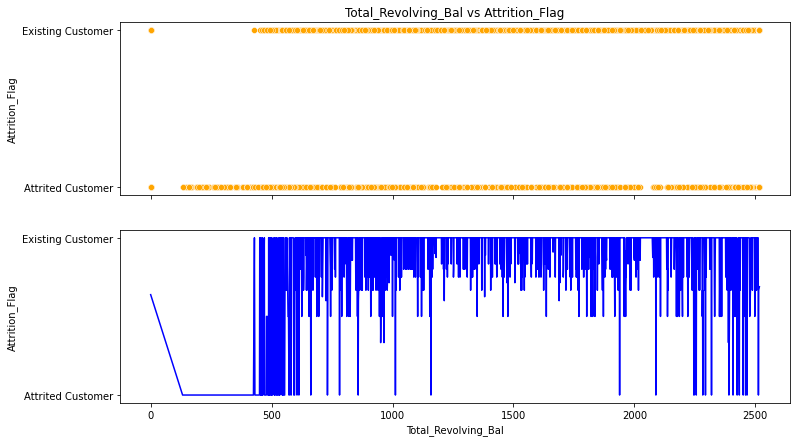

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Total_Revolving_Bal')

**Insights**
- Customers with low revolving balance tend to attrite more

### Avg_Open_To_Buy

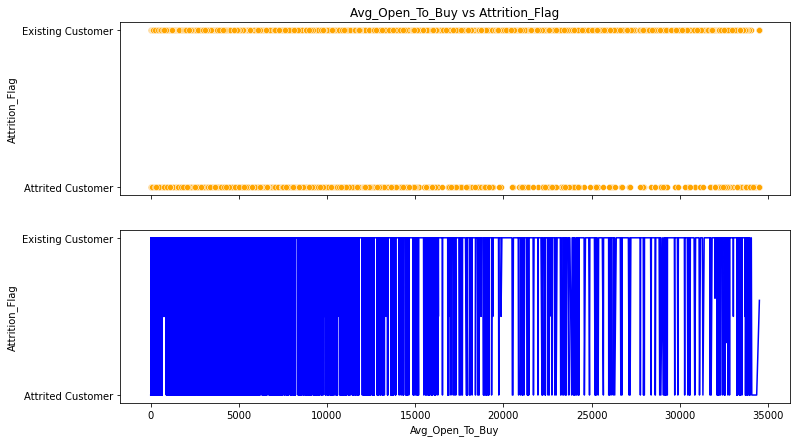

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Avg_Open_To_Buy')

**Insights**
- There is no visibe correleation

### Total_Amt_Chng_Q4_Q1

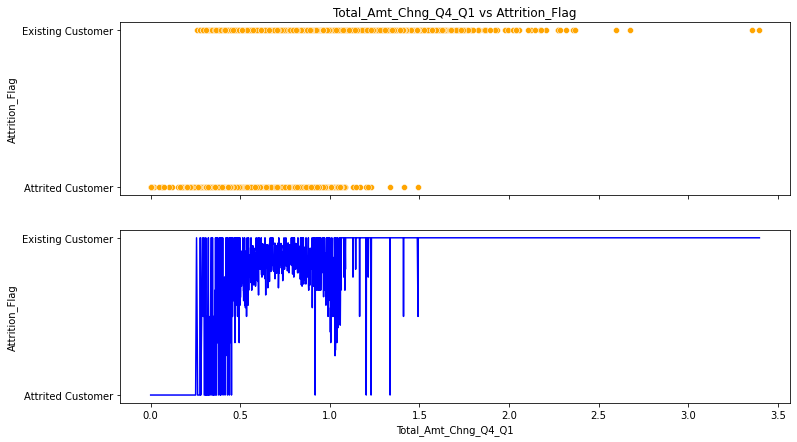

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Total_Amt_Chng_Q4_Q1')

**Insights**
- Customers with high Amount change between Q1 and Q4 does not attrite at all


### Total_Trans_Amt

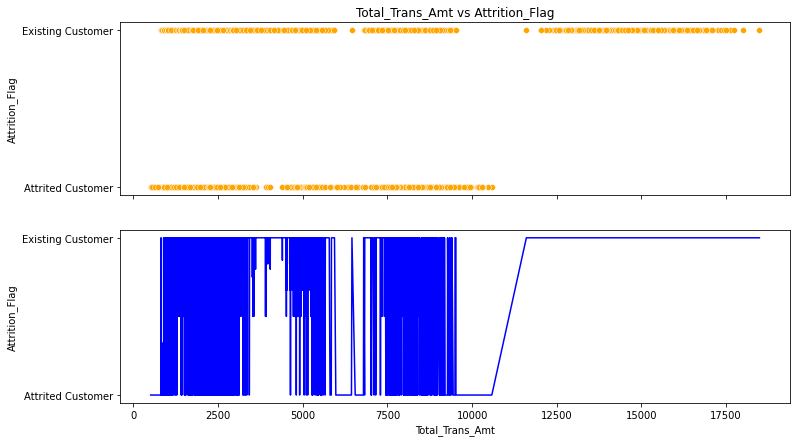

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Total_Trans_Amt')

**Insights**
- Customers with high transaction amounts does not attrite at all

### Total_Trans_Ct

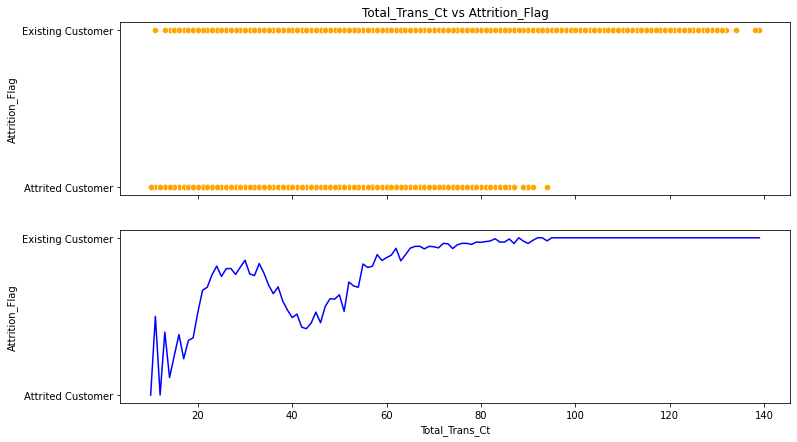

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Total_Trans_Ct')

**Insights**
- Custoers with high transaction counts does not attrite at all

### Total_Ct_Chng_Q4_Q1

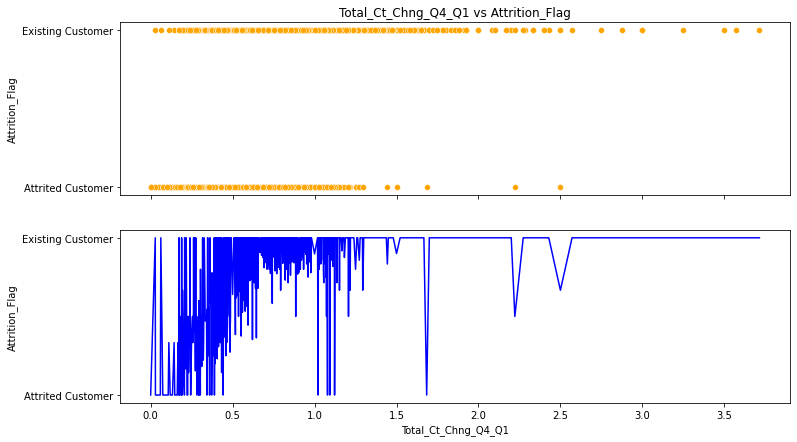

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Total_Ct_Chng_Q4_Q1')

**Insights**
- Custmers whuth high count change between Q1 and Q4 does not attrite

### Avg_Utilization_Ratio

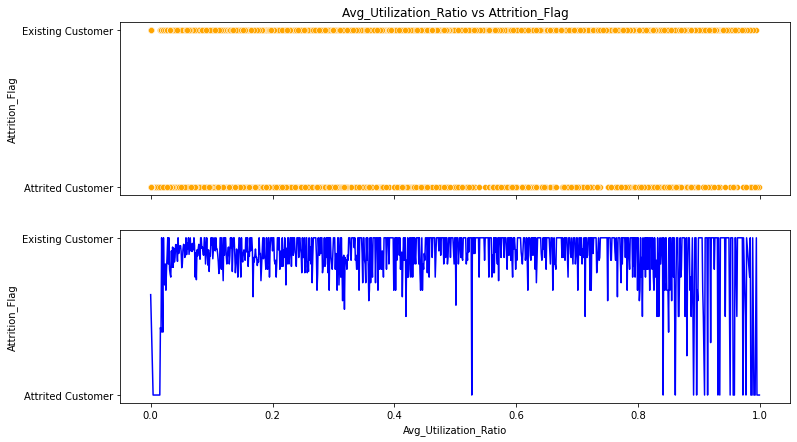

In [ ]:
scatter_lineplot(data=df, feature_y='Attrition_Flag', feature_x='Avg_Utilization_Ratio')

**Insights**
- Customers with high utilization ratio attrite more than those with low ratio

### Mean analysis

In [ ]:
# Mean of numerical variables grouped by attrition
data.groupby(["Attrition_Flag"])[num_cols].mean()

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,
Attrited Customer,46.6595,36.1782,"8,136.0395",672.8230,0.6943,"3,095.0258",44.9336,0.5544,0.1625
Existing Customer,46.2621,35.8806,"8,726.8775","1,256.6041",0.7725,"4,654.6559",68.6726,0.7424,0.2964


**Insights**
- Customers with lower Total_Revolving_Bal tend to attrite more 
- Customers with lower Total_Trans_Amount tend to attrite more
- Customers with lower Total_Trans_CT tend to attrite more
- Customers with lower Avg_Utilization_Ratio tend to attrite more

### Target vs Categorical Columns

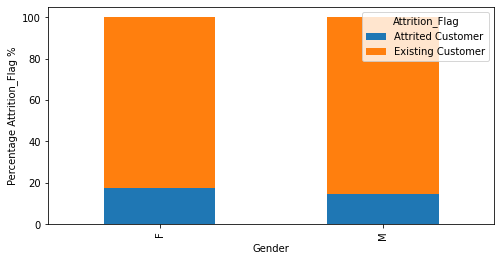

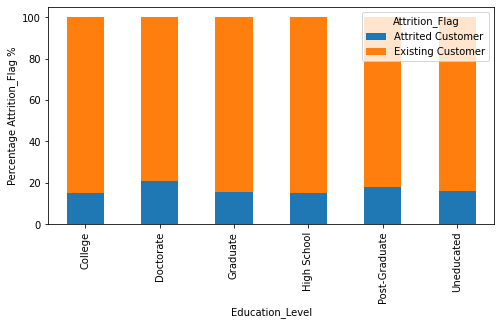

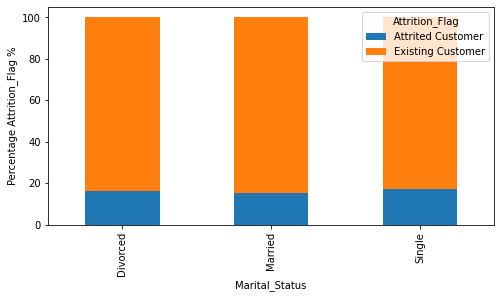

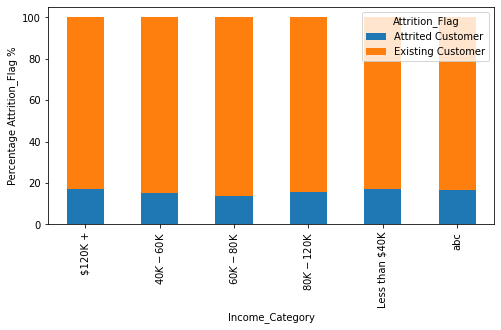

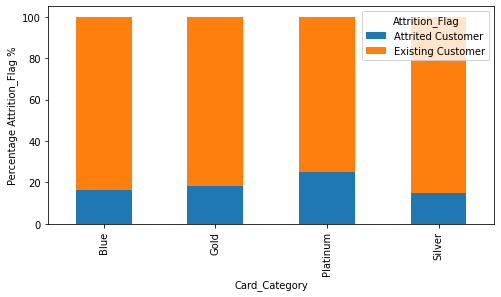

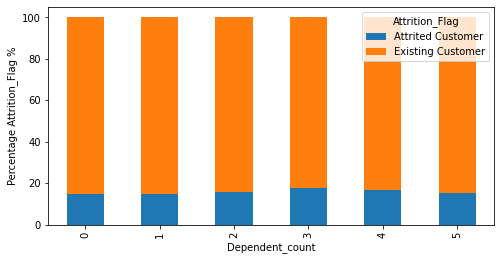

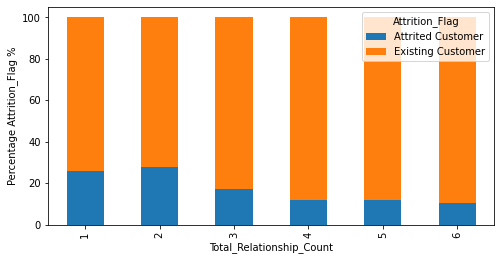

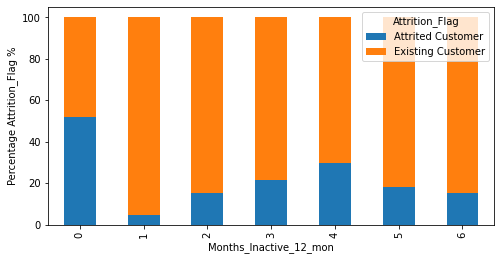

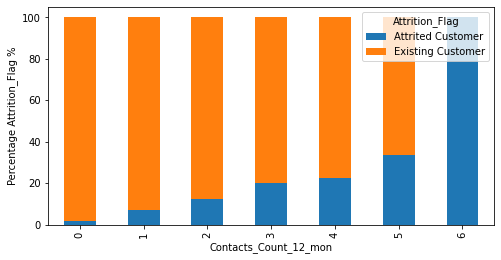

In [ ]:
for i in cat_cols:
  (pd.crosstab(data[i], data["Attrition_Flag"], normalize="index") * 100).plot(
    kind="bar", figsize=(8, 4), stacked=True
  )
  plt.ylabel("Percentage Attrition_Flag %")

**Insights**
- Male and female customers have the same ratio of attrition
- Customers with a doctorate tend to attrite more than other level of education
- Marital status seems to be indiferent to attrite
- Income category does not influence on the ratio of atttrition
- Platinum card customers are more willing to attrite than the others
- Dependent count seems to be indiferent on the ratio of attrition
- Customers with 1 or 2 products tend to attrite more than those with more prodcuts
- Customers with 0 months inactive in the las 12 months attrite more than the others
- As the number of contacts increases so the attrition

# Data Processing

- We can drop the column - CLIENTNUM as it is unique for each customer and will not add value to the model.

In [ ]:
df.drop(columns=["CLIENTNUM"], inplace=True)

- We can drop Avg_Open_To_Buy dur to a perfect correlation with Credit_Limit

In [ ]:
df.drop(columns=["Avg_Open_To_Buy"], inplace=True)

- We will replace 'abc' with NaN in the Income_Category feature, since they are missing values

In [ ]:
df.Income_Category.replace('abc', np.nan, inplace=True)

- We will make the following replacements in the target variable:
  - 'Existing Customer' with 1
  - 'Attrited Customer' with 0

In [ ]:
df.Attrition_Flag.replace('Existing Customer', 1, inplace=True)
df.Attrition_Flag.replace('Attrited Customer', 0, inplace=True)
df.Attrition_Flag.value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

- Change type to category of categorical variables and target variable

In [ ]:
df[cat_cols] = df[cat_cols].astype(dtype='category')
df.Attrition_Flag = df.Attrition_Flag.astype(dtype='category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [ ]:
# CREATE A COPY FOR MODEL BUILDING
df1 = df.copy()

## Split data

In [ ]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 7088
Number of rows in test data = 3039


## Missing value treatment

In [ ]:
X_train.isnull().sum()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1049
Marital_Status               523
Income_Category              792
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [ ]:
### IMPUTE Education Level
imputeEL = imputer.fit(X_train[['Education_Level']])
X_train.Education_Level = imputeEL.transform(X_train[['Education_Level']])
X_test.Education_Level = imputeEL.transform(X_test[['Education_Level']])

In [ ]:
### IMPUTE Marital_Status
imputeMS = imputer.fit(X_train[['Marital_Status']])
X_train.Marital_Status = imputeMS.transform(X_train[['Marital_Status']])
X_test.Marital_Status = imputeMS.transform(X_test[['Marital_Status']])

In [ ]:
### IMPUTE Income_Category
imputeIC = imputer.fit(X_train[['Income_Category']])
X_train.Income_Category = imputeIC.transform(X_train[['Income_Category']])
X_test.Income_Category = imputeIC.transform(X_test[['Income_Category']])

### Outlier treatment

- We will treat all the outliers. We will calculate the Q1 - 1.5 * IQR and Q1 + 1.5 * IQR on X_train and apply it to X_train and X_test

In [ ]:
cols_treat_outlier=['Total_Ct_Chng_Q4_Q1','Total_Trans_Ct','Total_Trans_Amt','Total_Amt_Chng_Q4_Q1',
                    'Credit_Limit','Months_on_book','Customer_Age']

In [ ]:
for col in cols_treat_outlier:
  treat_outliers(df=X_train, col=col, test=True)

### Normalize

In [ ]:
cols_to_normalize = ['Customer_Age','Months_on_book','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1',
                     'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

In [ ]:
scaler = StandardScaler()

for col in cols_to_normalize:
  norm = scaler.fit(X_train[[col]])
  X_train[[col]] = norm.transform(X_train[[col]])
  X_test[[col]] = norm.transform(X_test[[col]])


### LOG

In [ ]:
cols_to_log = ['Credit_Limit','Avg_Utilization_Ratio']

In [ ]:
# LOG

def log_apply(colname):
  # X_train
  if X_train[colname].min() > 0:
    X_train[colname + '_log'] = np.log(X_train[colname]) #we didnt add a value since df.New_Price.min() > 0
  else:
    X_train[colname + '_log'] = np.log(X_train[colname] + 0.01) #we add a small value
  
  #X_test
  if X_test[colname].min() > 0:
    X_test[colname + '_log'] = np.log(X_test[colname]) #we didnt add a value since df.New_Price.min() > 0
  else:
    X_test[colname + '_log'] = np.log(X_test[colname] + 0.01) #we add a small value
  

for colname in cols_to_log:
  log_apply(colname)
  
X_train.drop(cols_to_log, axis=1, inplace=True)
X_test.drop(cols_to_log, axis=1, inplace=True)

### Creating dummies

In [ ]:
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

# Building the model

**Model evaluation criterion**

**Model can make wrong predictions as:**
1. Predicting a customer will attrite and the Customer keeps being a Customer, Prerdict 0 <=> Actual 1, False Negative - There is NO loss
2. Predicting a customer will not attrite and the customer attrite, Predict 1 <=> Actual 0, False Positive - Loss of a Customer (resources)

**Which case is more important?**
- Predicting a customer will not attrite and the customer attrites (False Positives) because the model is "allowing" the loss of customers

**How to reduce this loss i.e need to reduce False positives?**
- Company wants Precision to be maximized, greater the Precision lesser the chances of false positives.

## Train basic models

We will train 6 models:
1. Logistic regression
2. Decision Tree
3. Random Forest
4. Bagging
5. Adaboost
6. Gradient Boosting

### Logistic Regression

In [ ]:
lr = LogisticRegression(solver="newton-cg", random_state=1)
model_lr = lr.fit(X_train, y_train)

In [ ]:
lr_score_train = model_performance_classification_sklearn(model_lr, X_train, y_train, 'Logistic Regression')
df_comp_train = lr_score_train
print('Train Scores')
lr_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression,0.9216,0.9701,0.9385,0.9540


In [ ]:
lr_score_test = model_performance_classification_sklearn(model_lr, X_test, y_test, 'Logistic Regression')
df_comp_test = lr_score_test
print('Test Scores')
lr_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression,0.9095,0.9651,0.9298,0.9471


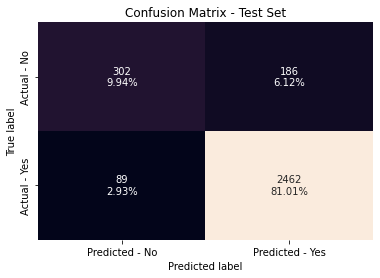

In [ ]:
pred_test = model_lr.predict(X_test)
make_confusion_matrix(model_lr, y_test, pred_test, 'Confusion Matrix - Test Set')

### Decision Tree

In [ ]:
y_train.value_counts(normalize=True)

1   0.8393
0   0.1607
Name: Attrition_Flag, dtype: float64

In [ ]:
dt = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.84, 1: 0.16}, random_state=1)
model_dt = dt.fit(X_train, y_train)

In [ ]:
dt_score_train = model_performance_classification_sklearn(model_dt, X_train, y_train, 'Decission Tree')
df_comp_train = pd.concat([df_comp_train, dt_score_train], axis=0)
print('Train Scores')
dt_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Decission Tree,1.0000,1.0000,1.0000,1.0000


In [ ]:
dt_score_test = model_performance_classification_sklearn(model_dt, X_test, y_test, 'Decission Tree')
df_comp_test = pd.concat([df_comp_test, dt_score_test], axis=0)
print('Test Scores')
dt_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Decission Tree,0.9177,0.9541,0.9482,0.9512


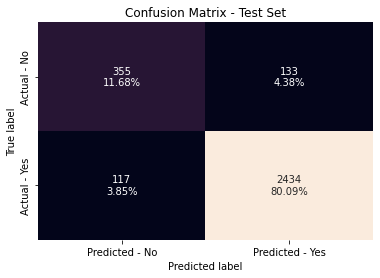

In [ ]:
pred_test = model_dt.predict(X_test)
make_confusion_matrix(model_dt,y_test, pred_test, 'Confusion Matrix - Test Set')

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1, class_weight={0: 0.84, 1: 0.16})
model_rf = rf.fit(X_train, y_train)

In [ ]:
rf_score_train = model_performance_classification_sklearn(model_rf, X_train, y_train, 'Random Forest')
df_comp_train = pd.concat([df_comp_train, rf_score_train], axis=0)
print('Train Scores')
rf_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Random Forest,1.0000,1.0000,1.0000,1.0000


In [ ]:
rf_score_test = model_performance_classification_sklearn(model_rf, X_test, y_test, 'Random Forest')
df_comp_test = pd.concat([df_comp_test, rf_score_test], axis=0)
print('Test Scores')
rf_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Random Forest,0.9348,0.9890,0.9369,0.9622


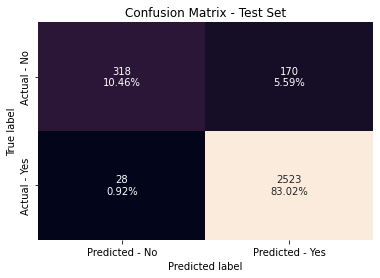

In [ ]:
pred_test = model_rf.predict(X_test)
make_confusion_matrix(model_rf, y_test, pred_test, 'Confusion Matrix - Test Set')

### Bagging Classifier

In [ ]:
bc = BaggingClassifier(random_state=1)
model_bc = bc.fit(X_train,y_train)

In [ ]:
bc_score_train = model_performance_classification_sklearn(model_bc, X_train, y_train, 'Bagging')
df_comp_train = pd.concat([df_comp_train, bc_score_train], axis=0)
print('Train Scores')
bc_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Bagging,0.9972,0.9978,0.9988,0.9983


In [ ]:
bc_score_test = model_performance_classification_sklearn(model_bc, X_test, y_test, 'Bagging')
df_comp_test = pd.concat([df_comp_test, bc_score_test], axis=0)
print('Test Scores')
bc_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Bagging,0.9470,0.9710,0.9661,0.9685


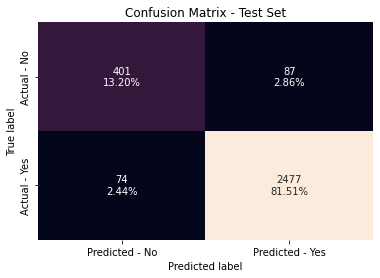

In [ ]:
pred_test = model_bc.predict(X_test)
make_confusion_matrix(model_bc,y_test, pred_test, 'Confusion Matrix - Test Set')

### Adaboost


In [ ]:
ab = AdaBoostClassifier(random_state=1)
model_ab = ab.fit(X_train,y_train)

In [ ]:
ab_score_train = model_performance_classification_sklearn(model_ab, X_train, y_train, 'Adaboost')
df_comp_train = pd.concat([df_comp_train, ab_score_train], axis=0)
print('Train Scores')
ab_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Adaboost,0.9585,0.9808,0.9701,0.9754


In [ ]:
ab_score_test = model_performance_classification_sklearn(model_ab, X_test, y_test, 'Adaboost')
df_comp_test = pd.concat([df_comp_test, ab_score_test], axis=0)
print('Test Scores')
ab_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Adaboost,0.9566,0.9788,0.9697,0.9742


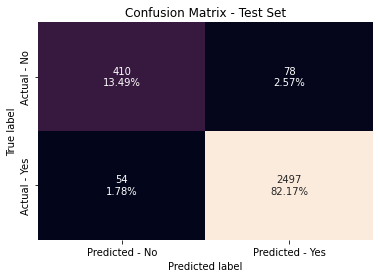

In [ ]:
pred_test = model_ab.predict(X_test)
make_confusion_matrix(model_ab, y_test, pred_test, 'Confusion Matrix - Test Set')

### Gradient Boosting


In [ ]:
gb = GradientBoostingClassifier(random_state=1)
model_gb = gb.fit(X_train,y_train)

In [ ]:
gb_score_train = model_performance_classification_sklearn(model_gb, X_train, y_train, 'Gradient Boosting')
df_comp_train = pd.concat([df_comp_train, gb_score_train], axis=0)
print('Train Scores')
gb_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Gradient Boosting,0.9739,0.9914,0.9778,0.9846


In [ ]:
gb_score_test = model_performance_classification_sklearn(model_gb, X_test, y_test, 'Gradient Boosting')
df_comp_test = pd.concat([df_comp_test, gb_score_test], axis=0)
print('Test Scores')
gb_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Gradient Boosting,0.9615,0.9875,0.9674,0.9773


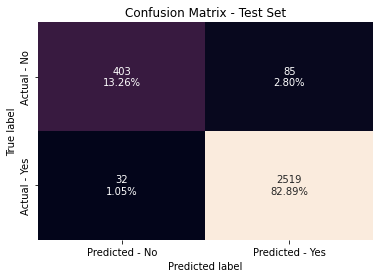

In [ ]:
pred_test = model_gb.predict(X_test)
make_confusion_matrix(model_gb, y_test, pred_test, 'Confusion Matrix - Test Set')

## Train oversampled models

In [ ]:
print("Before Oversampling, counts of label 1: {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 0: {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 1: {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 0: {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 1: 5949
Before Oversampling, counts of label 0: 1139 

After Oversampling, counts of label 1: 5949
After Oversampling, counts of label 0: 5949 

After Oversampling, the shape of train_X: (11898, 46)
After Oversampling, the shape of train_y: (11898,) 



### Logistic Regression Oversampled

In [ ]:
lro = LogisticRegression(solver="newton-cg", random_state=1)
model_lro = lro.fit(X_train_over, y_train_over)

In [ ]:
lro_score_train = model_performance_classification_sklearn(model_lro, X_train, y_train, 'Logistic Regression OS')
df_comp_train = pd.concat([df_comp_train, lro_score_train], axis=0)
print('Train Scores')
lro_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression OS,0.9072,0.9450,0.9444,0.9447


In [ ]:
lro_score_test = model_performance_classification_sklearn(model_lro, X_test, y_test, 'Logistic Regression OS')
df_comp_test = pd.concat([df_comp_test, lro_score_test], axis=0)
print('Test Scores')
lro_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression OS,0.9042,0.9483,0.9383,0.9433


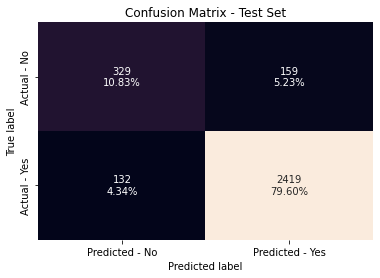

In [ ]:
pred_test = model_lro.predict(X_test)
make_confusion_matrix(model_lro,y_test, pred_test, 'Confusion Matrix - Test Set')

### Decision Tree Oversampled

In [ ]:
dto = DecisionTreeClassifier(criterion="gini", random_state=1)
model_dto = dto.fit(X_train_over, y_train_over)

In [ ]:
dto_score_train = model_performance_classification_sklearn(model_dto, X_train, y_train, 'Decision Tree OS')
df_comp_train = pd.concat([df_comp_train, dto_score_train], axis=0)
print('Train Scores')
dto_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Decision Tree OS,1.0000,1.0000,1.0000,1.0000


In [ ]:
dto_score_test = model_performance_classification_sklearn(model_dto, X_test, y_test, 'Decision Tree OS')
df_comp_test = pd.concat([df_comp_test, dto_score_test], axis=0)
print('Test Scores')
dto_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Decision Tree OS,0.9214,0.9502,0.9558,0.9530


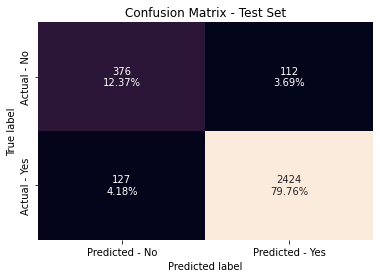

In [ ]:
pred_test = model_dto.predict(X_test)
make_confusion_matrix(model_dto, y_test, pred_test, 'Confusion Matrix - Test Set')

### Random Forest Oversampled

In [ ]:
rfo = RandomForestClassifier(random_state=1)
model_rfo = rfo.fit(X_train_over, y_train_over)

In [ ]:
rfo_score_train = model_performance_classification_sklearn(model_rfo, X_train, y_train, 'Random Forest OS')
df_comp_train = pd.concat([df_comp_train, rfo_score_train], axis=0)
print('Train Scores')
rfo_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Random Forest OS,1.0000,1.0000,1.0000,1.0000


In [ ]:
rfo_score_test = model_performance_classification_sklearn(model_rfo, X_test, y_test, 'Random Forest OS')
df_comp_test = pd.concat([df_comp_test, rfo_score_test], axis=0)
print('Test Scores')
rfo_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Random Forest OS,0.9391,0.9675,0.9603,0.9639


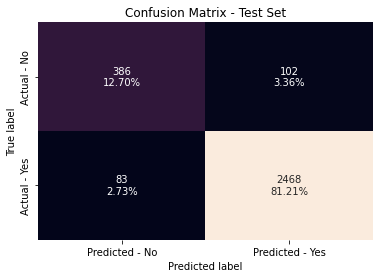

In [ ]:
pred_test = model_rfo.predict(X_test)
make_confusion_matrix(model_rfo, y_test, pred_test, 'Confusion Matrix - Test Set')

### Bagging Classifier Oversampled

In [ ]:
bco = BaggingClassifier(random_state=1)
model_bco = bco.fit(X_train_over, y_train_over)

In [ ]:
bco_score_train = model_performance_classification_sklearn(model_bco, X_train, y_train, 'Bagging OS')
df_comp_train = pd.concat([df_comp_train, bco_score_train], axis=0)
print('Train Scores')
bco_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Bagging OS,0.9952,0.9951,0.9992,0.9971


In [ ]:
bco_score_test = model_performance_classification_sklearn(model_bco, X_test, y_test, 'Bagging OS')
df_comp_test = pd.concat([df_comp_test, bco_score_test], axis=0)
print('Test Scores')
bco_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Bagging OS,0.9368,0.9537,0.9705,0.9620


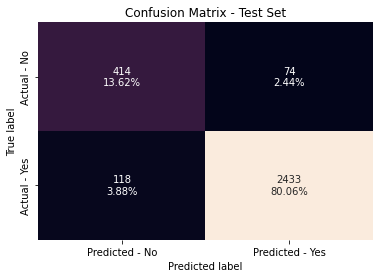

In [ ]:
pred_test = model_bco.predict(X_test)
make_confusion_matrix(model_bco, y_test, pred_test, 'Confusion Matrix - Test Set')

### Adaboost Oversampled

In [ ]:
abo = AdaBoostClassifier(random_state=1)
model_abo = abo.fit(X_train_over, y_train_over)

In [ ]:
abo_score_train = model_performance_classification_sklearn(model_abo, X_train, y_train, 'Adaboost OS')
df_comp_train = pd.concat([df_comp_train, abo_score_train], axis=0)
print('Train Scores')
abo_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Adaboost OS,0.9454,0.9548,0.9796,0.9671


In [ ]:
abo_score_test = model_performance_classification_sklearn(model_abo, X_test, y_test, 'Adaboost OS')
df_comp_test = pd.concat([df_comp_test, abo_score_test], axis=0)
print('Test Scores')
abo_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Adaboost OS,0.9441,0.9522,0.9806,0.9662


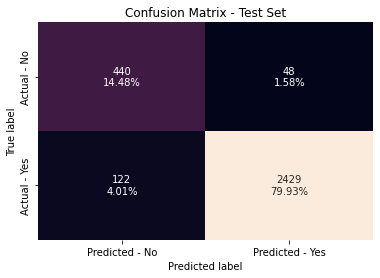

In [ ]:
pred_test = model_abo.predict(X_test)
make_confusion_matrix(model_abo, y_test, pred_test, 'Confusion Matrix - Test Set')

### Gradient Boosting Oversampled

In [ ]:
gbo = GradientBoostingClassifier(random_state=1)
model_gbo = gbo.fit(X_train_over, y_train_over)

In [ ]:
gbo_score_train = model_performance_classification_sklearn(model_gbo, X_train, y_train, 'Gradientboost OS')
df_comp_train = pd.concat([df_comp_train, gbo_score_train], axis=0)
print('Train Scores')
gbo_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Gradientboost OS,0.9667,0.9701,0.9900,0.9800


In [ ]:
gbo_score_test = model_performance_classification_sklearn(model_gbo, X_test, y_test, 'Gradientboost OS')
df_comp_test = pd.concat([df_comp_test, gbo_score_test], axis=0)
print('Test Scores')
gbo_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Gradientboost OS,0.9579,0.9682,0.9813,0.9747


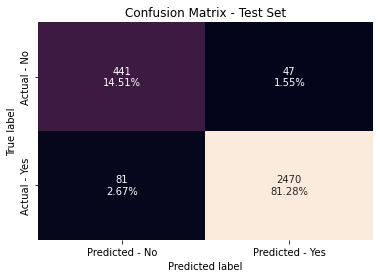

In [ ]:
pred_test = model_gbo.predict(X_test)
make_confusion_matrix(model_gbo, y_test, pred_test, 'Confusion Matrix - Test Set')

## Train undersampled models

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 5949
Before Undersampling, counts of label 'No': 1139 

After Undersampling, counts of label 'Yes': 1139
After Undersampling, counts of label 'No': 1139 

After Undersampling, the shape of train_X: (2278, 46)
After Undersampling, the shape of train_y: (2278,) 



### Logistic Regression Undersampled

In [ ]:
lru = LogisticRegression(solver="newton-cg", random_state=1)
model_lru = lru.fit(X_train_un, y_train_un)

In [ ]:
lru_score_train = model_performance_classification_sklearn(model_lru, X_train, y_train, 'Logistic Regression US')
df_comp_train = pd.concat([df_comp_train, lru_score_train], axis=0)
print('Train Scores')
lru_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression US,0.8688,0.8659,0.9750,0.9172


In [ ]:
lru_score_test = model_performance_classification_sklearn(model_lru, X_test, y_test, 'Logistic Regression US')
df_comp_test = pd.concat([df_comp_test, lru_score_test], axis=0)
print('Test Scores')
lru_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression US,0.8618,0.8604,0.9717,0.9127


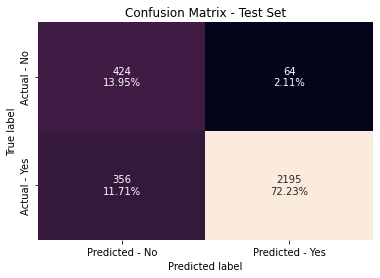

In [ ]:
pred_test = model_lru.predict(X_test)
make_confusion_matrix(model_lru, y_test, pred_test, 'Confusion Matrix - Test Set')

### Decision Tree Undersampled

In [ ]:
dtu = DecisionTreeClassifier(criterion="gini", random_state=1)
model_dtu = dtu.fit(X_train_un, y_train_un)

In [ ]:
dtu_score_train = model_performance_classification_sklearn(model_dtu, X_train, y_train, 'Decision Tree US')
df_comp_train = pd.concat([df_comp_train, dtu_score_train], axis=0)
print('Train Scores')
dtu_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Decision Tree US,0.9340,0.9213,1.0000,0.9591


In [ ]:
dtu_score_test = model_performance_classification_sklearn(model_dtu, X_test, y_test, 'Decision Tree US')
df_comp_test = pd.concat([df_comp_test, dtu_score_test], axis=0)
print('Test Scores')
dtu_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Decision Tree US,0.8944,0.8993,0.9729,0.9346


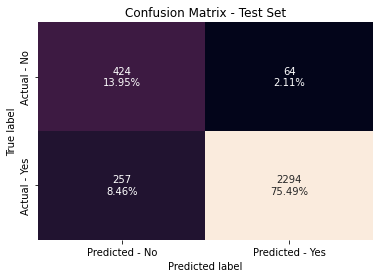

In [ ]:
pred_test = model_dtu.predict(X_test)
make_confusion_matrix(model_dtu, y_test, pred_test, 'Confusion Matrix - Test Set')

### Random Forest Undersampled

In [ ]:
rfu = RandomForestClassifier(random_state=1)
model_rfu = rfu.fit(X_train_un, y_train_un)

In [ ]:
rfu_score_train = model_performance_classification_sklearn(model_rfu, X_train, y_train, 'Random Forest US')
df_comp_train = pd.concat([df_comp_train, rfu_score_train], axis=0)
print('Train Scores')
rfu_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Random Forest US,0.9447,0.9341,1.0000,0.9659


In [ ]:
rfu_score_test = model_performance_classification_sklearn(model_rfu, X_test, y_test, 'Random Forest US')
df_comp_test = pd.concat([df_comp_test, rfu_score_test], axis=0)
print('Test Scores')
rfu_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Random Forest US,0.9161,0.9122,0.9869,0.9481


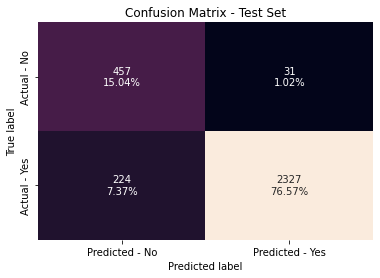

In [ ]:
pred_test = model_rfu.predict(X_test)
make_confusion_matrix(model_rfu, y_test, pred_test, 'Confusion Matrix - Test Set')

### Bagging Classifier Undersampled

In [ ]:
bcu = BaggingClassifier(random_state=1)
model_bcu = bcu.fit(X_train_un, y_train_un)

In [ ]:
bcu_score_train = model_performance_classification_sklearn(model_bcu, X_train, y_train, 'Bagging US')
df_comp_train = pd.concat([df_comp_train, bcu_score_train], axis=0)
print('Train Scores')
bcu_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Bagging US,0.9304,0.9173,0.9998,0.9568


In [ ]:
bcu_score_test = model_performance_classification_sklearn(model_bcu, X_test, y_test, 'Bagging US')
df_comp_test = pd.concat([df_comp_test, bcu_score_test], axis=0)
print('Test Scores')
bcu_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Bagging US,0.9006,0.8961,0.9841,0.9380


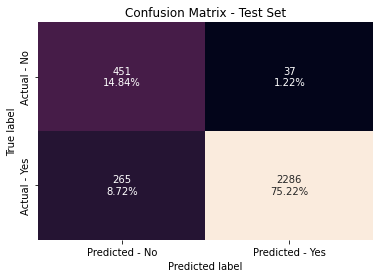

In [ ]:
pred_test = model_bcu.predict(X_test)
make_confusion_matrix(model_bcu, y_test, pred_test, 'Confusion Matrix - Test Set')

### Adaboost Undersampled

In [ ]:
abu = AdaBoostClassifier(random_state=1)
model_abu = abo.fit(X_train_un, y_train_un)

In [ ]:
abu_score_train = model_performance_classification_sklearn(model_abu, X_train, y_train, 'Adaboost US')
df_comp_train = pd.concat([df_comp_train, abu_score_train], axis=0)
print('Train Scores')
abu_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Adaboost US,0.9310,0.9274,0.9898,0.9576


In [ ]:
abu_score_test = model_performance_classification_sklearn(model_abu, X_test, y_test, 'Adaboost US')
df_comp_test = pd.concat([df_comp_test, abu_score_test], axis=0)
print('Test Scores')
abu_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Adaboost US,0.9293,0.9279,0.9871,0.9566


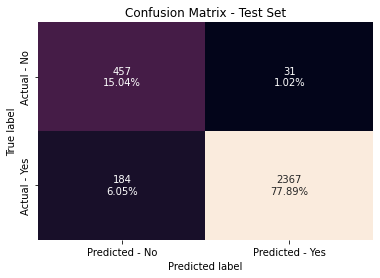

In [ ]:
pred_test = model_abu.predict(X_test)
make_confusion_matrix(model_abu, y_test, pred_test, 'Confusion Matrix - Test Set')

### Gradient Boosting Undersampled

In [ ]:
gbu = GradientBoostingClassifier(random_state=1)
model_gbu = gbu.fit(X_train_un, y_train_un)

In [ ]:
gbu_score_train = model_performance_classification_sklearn(model_gbu, X_train, y_train, 'Gradientboost US')
df_comp_train = pd.concat([df_comp_train, gbu_score_train], axis=0)
print('Train Scores')
gbu_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Gradientboost US,0.9501,0.9437,0.9966,0.9694


In [ ]:
gbu_score_test = model_performance_classification_sklearn(model_gbu, X_test, y_test, 'Gradientboost US')
df_comp_test = pd.concat([df_comp_test, gbu_score_test], axis=0)
print('Test Scores')
gbu_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Gradientboost US,0.9385,0.9365,0.9896,0.9623


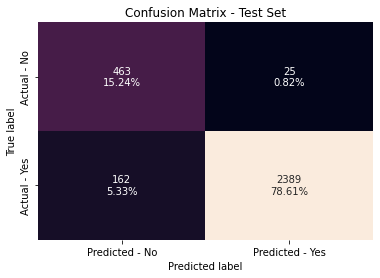

In [ ]:
pred_test = model_gbu.predict(X_test)
make_confusion_matrix(model_gbu, y_test, pred_test, 'Confusion Matrix - Test Set')

## Compare 18 models

In [ ]:
df_comp_train.reset_index(drop=True, inplace=True)
print('       ************* Comparison in training set ***************')
df_comp_train

       ************* Comparison in training set ***************


,Model,Accuracy,Recall,Precision,F1
0,Logistic Regression,0.9216,0.9701,0.9385,0.9540
1,Decission Tree,1.0000,1.0000,1.0000,1.0000
2,Random Forest,1.0000,1.0000,1.0000,1.0000
3,Bagging,0.9972,0.9978,0.9988,0.9983
4,Adaboost,0.9585,0.9808,0.9701,0.9754
5,Gradient Boosting,0.9739,0.9914,0.9778,0.9846
6,Logistic Regression OS,0.9072,0.9450,0.9444,0.9447
7,Decision Tree OS,1.0000,1.0000,1.0000,1.0000
8,Random Forest OS,1.0000,1.0000,1.0000,1.0000
9,Bagging OS,0.9952,0.9951,0.9992,0.9971


In [ ]:
df_comp_test.reset_index(drop=True, inplace=True)
print('       ************* Comparison in training set ***************')
df_comp_test.sort_values(by='Precision', ascending=False)

       ************* Comparison in training set ***************


,Model,Accuracy,Recall,Precision,F1
17,Gradientboost US,0.9385,0.9365,0.9896,0.9623
16,Adaboost US,0.9293,0.9279,0.9871,0.9566
14,Random Forest US,0.9161,0.9122,0.9869,0.9481
15,Bagging US,0.9006,0.8961,0.9841,0.9380
11,Gradientboost OS,0.9579,0.9682,0.9813,0.9747
10,Adaboost OS,0.9441,0.9522,0.9806,0.9662
13,Decision Tree US,0.8944,0.8993,0.9729,0.9346
12,Logistic Regression US,0.8618,0.8604,0.9717,0.9127
9,Bagging OS,0.9368,0.9537,0.9705,0.9620
4,Adaboost,0.9566,0.9788,0.9697,0.9742


**We can see that the best 3 models are:**
1. Gradient Boosting US
2. Adaboost US
3. Random Forest US

**Undersampling** approach threw **better Precision scores**

**We will try to improve them even further with hyperparameter tuning**

## Model hyperparameter tuning

### Gradient Boost Undersampled - Tuned

In [ ]:
# Lets see the list of hyperparameters that can be modified
gbu.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

**We will try improving the model with this 3 hyperparameters:**
1. n_estimators
2. subsample
3. max_features

In [ ]:
%%time 

# defining model
gbu_tuned = gbu

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": [100, 150, 250],
    "subsample":[0.8, 0.9, 1],
    "max_features":[0.7, 0.85, 1]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=gbu_tuned, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

# Set the clf to the best combination of parameters
gbu_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gbu_tuned.fit(X_train, y_train)


CPU times: user 10.9 s, sys: 397 ms, total: 11.3 s
Wall time: 2min 59s


GradientBoostingClassifier(max_features=0.85, n_estimators=250, random_state=1,
                           subsample=0.9)

In [ ]:
gbu_tuned_score_train = model_performance_classification_sklearn(gbu_tuned, X_train, y_train, 'Gradientboost US Tuned')
df_best_3_train =  gbu_tuned_score_train
print('Train Scores')
gbu_tuned_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Gradientboost US Tuned,0.9887,0.9956,0.9910,0.9933


In [ ]:
gbu_tuned_score_test = model_performance_classification_sklearn(gbu_tuned, X_test, y_test, 'Gradientboost US Tuned')
df_best_3_test = gbu_tuned_score_test
print('Test Scores')
gbu_tuned_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Gradientboost US Tuned,0.9707,0.9878,0.9775,0.9826


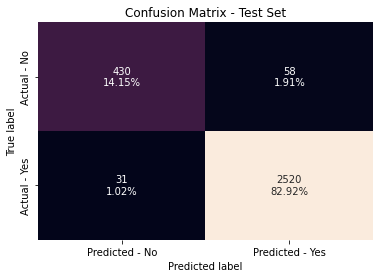

In [ ]:
pred_test = gbu_tuned.predict(X_test)
make_confusion_matrix(gbu_tuned, y_test, pred_test, 'Confusion Matrix - Test Set')

### Ada Boost Undersampled - Tuned

In [ ]:
# Lets see the list of hyperparameters that can be modified
abu.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

**We will try improving the model with this 3 hyperparameters:**
1. n_estimators
2. learning_rate
3. base_estimator 

In [ ]:
%%time 

# defining model
abu_tuned = abu

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=abu_tuned, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

# Set the clf to the best combination of parameters
abu_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
abu_tuned.fit(X_train, y_train)


CPU times: user 6.04 s, sys: 373 ms, total: 6.41 s
Wall time: 3min 3s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [ ]:
abu_tuned_score_train = model_performance_classification_sklearn(abu_tuned, X_train, y_train, 'Adaboost US Tuned')
df_best_3_train = pd.concat([df_best_3_train, abu_tuned_score_train], axis=0)
print('Train Scores')
abu_tuned_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Adaboost US Tuned,0.9931,0.9966,0.9951,0.9959


In [ ]:
abu_tuned_score_test = model_performance_classification_sklearn(abu_tuned, X_test, y_test, 'Adaboost US Tuned')
df_best_3_test = pd.concat([df_best_3_test, abu_tuned_score_test], axis=0)
print('Test Scores')
abu_tuned_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Adaboost US Tuned,0.9645,0.9800,0.9777,0.9789


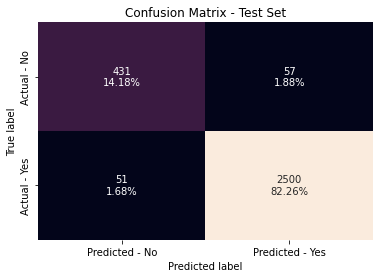

In [ ]:
pred_test = abu_tuned.predict(X_test)
make_confusion_matrix(abu_tuned, y_test, pred_test, 'Confusion Matrix - Test Set')

### Random Forest Undersampled - Tuned

In [ ]:
# Lets see the list of hyperparameters that can be modified
rfu.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

**We will try improving the model with this 5 hyperparameters:**
1. max_depth
2. n_estimators
3. min_samples_leaf
4. max_features
5. max_samples 

In [ ]:
%%time 

# defining model
rfu_tuned = rfu

# Parameter grid to pass in GridSearchCV

param_grid = {
    "max_depth":[5,10],
    "n_estimators": [100,150,250],
    "min_samples_leaf": np.arange(5, 9, 2),
    "max_features": np.arange(0.2, 0.5, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.2)
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(precision_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=rfu_tuned, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

# Set the clf to the best combination of parameters
rfu_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
rfu_tuned.fit(X_train, y_train)


CPU times: user 6.02 s, sys: 382 ms, total: 6.4 s
Wall time: 3min 14s


RandomForestClassifier(max_depth=10, max_features=0.4000000000000001,
                       max_samples=0.5, min_samples_leaf=5, n_estimators=150,
                       random_state=1)

In [ ]:
rfu_tuned_score_train = model_performance_classification_sklearn(rfu_tuned, X_train, y_train, 'Random Forest US Tuned')
df_best_3_train = pd.concat([df_best_3_train, rfu_tuned_score_train], axis=0)
print('Train Scores')
rfu_tuned_score_train

Train Scores


,Model,Accuracy,Recall,Precision,F1
0,Random Forest US Tuned,0.9719,0.9914,0.9755,0.9834


In [ ]:
rfu_tuned_score_test = model_performance_classification_sklearn(rfu_tuned, X_test, y_test, 'Random Forest US Tuned')
df_best_3_test = pd.concat([df_best_3_test, rfu_tuned_score_test], axis=0)
print('Test Scores')
rfu_tuned_score_test

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Random Forest US Tuned,0.9529,0.9847,0.9602,0.9723


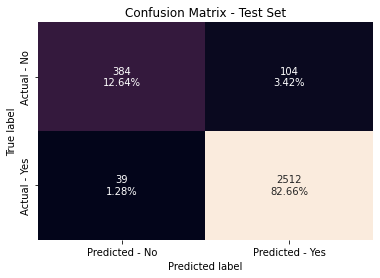

In [ ]:
pred_test = rfu_tuned.predict(X_test)
make_confusion_matrix(rfu_tuned, y_test, pred_test, 'Confusion Matrix - Test Set')

# Final Model Evaluation

In [ ]:
df_best_3_train.reset_index(drop=True, inplace=True)
print('       ************* Comparison in training set ***************')
df_best_3_train.sort_values(by='Precision', ascending=False)

       ************* Comparison in training set ***************


,Model,Accuracy,Recall,Precision,F1
1,Adaboost US Tuned,0.9931,0.9966,0.9951,0.9959
0,Gradientboost US Tuned,0.9887,0.9956,0.9910,0.9933
2,Random Forest US Tuned,0.9719,0.9914,0.9755,0.9834


In [ ]:
df_best_3_test.reset_index(drop=True, inplace=True)
print('       ************* Comparison in training set ***************')
df_best_3_test.sort_values(by='Precision', ascending=False)

       ************* Comparison in training set ***************


,Model,Accuracy,Recall,Precision,F1
1,Adaboost US Tuned,0.9645,0.9800,0.9777,0.9789
0,Gradientboost US Tuned,0.9707,0.9878,0.9775,0.9826
2,Random Forest US Tuned,0.9529,0.9847,0.9602,0.9723


The 3 models are performing great:
- Precision score: difference between them lesser than 1.5% (most important metric for the project)
- Recall Score: difference between them lesser than 1%
- F1 Score: difference between them lesser than 1%
- Accuracy: difference between them is lesser than 2%

After tuning the models the **best model** is **ADA BOOST** with undersampled data, because it has the higher precision and also have a great performance in Recall, F1 and Accuracy scores

# Productionize the model

## Numerical variables

In [ ]:
num_cols

['Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
cat_cols

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

In [ ]:
# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

#creating a transformer for features to normalize
normalize_transformer = Pipeline(steps=[("mormalize", StandardScaler())])

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", drop='first')),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("norm", normalize_transformer, cols_to_normalize),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="passthrough",
)

In [ ]:
# Separating target variable and other variables
Xm = df1.drop(columns="Attrition_Flag")
ym = df1["Attrition_Flag"]

In [ ]:
# Splitting the data into train and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(Xm, ym, test_size=0.30, random_state=1, stratify=ym)
print(X_train_m.shape, X_test_m.shape)

(7088, 18) (3039, 18)


In [ ]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "ADA",
            AdaBoostClassifier(
                base_estimator=DecisionTreeClassifier(max_depth=2,random_state=1),
                learning_rate=1, 
                n_estimators=90, 
                random_state=1
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_m, y_train_m)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                  

In [ ]:
pred = model.predict(X_test_m)

In [ ]:
model_test_score = model_performance_classification_sklearn(model, X_test_m, y_test_m, 'Adaboost US - Tuned')
print('Test Scores')
model_test_score

Test Scores


,Model,Accuracy,Recall,Precision,F1
0,Adaboost US - Tuned,0.9628,0.9824,0.9736,0.9780


# Actionable Insights & Recommendations



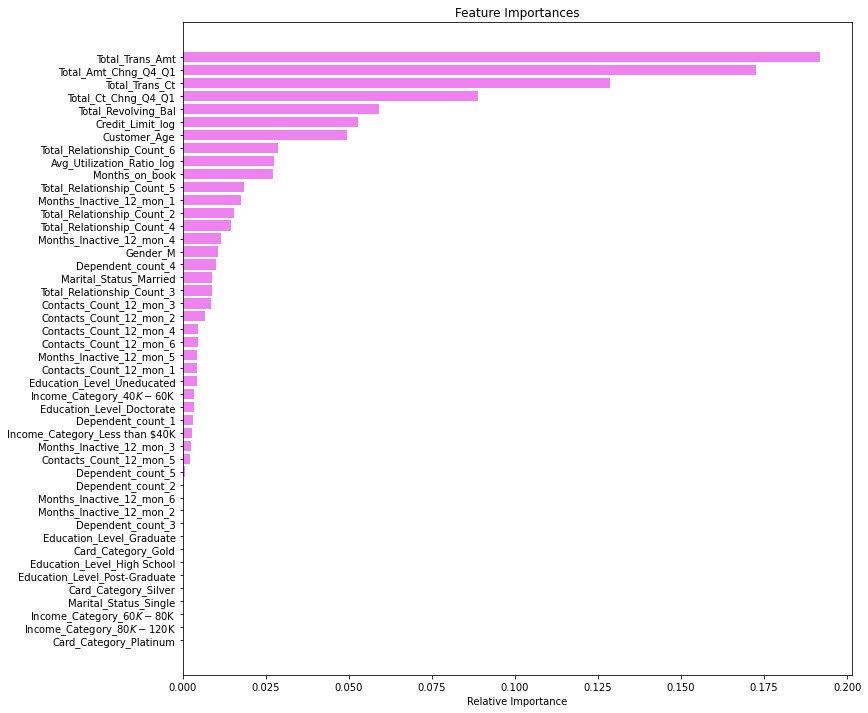

In [ ]:
feature_names = X_train.columns
importances = abu_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Business Insights and recommendations

1. We have created a machine learning model that can predict almos perfectly (more than 97%) if a Custommer will attrite. You shoul use the model to predict which Customers will attrtie and do some follow up on them before they do.

2. The total amount of transactions in the past 12 months is the most influential feature to predict attrition.

3. Based on EDA insights: 

  a. Male and female customers have the same ratio of attrition
  
  b. Customers with a doctorate tend to attrite more than other level of education
  
  c. Marital status seems to be indiferent to attrite

  d. Income category does not influence on the ratio of atttrition

  e. Platinum card customers are more willing to attrite than the others

  f. Dependent count seems to be indiferent on the ratio of attrition

  g. Customers with 1 or 2 products tend to attrite more than those with more prodcuts

  h. Customers with 0 months inactive in the las 12 months attrite more than the others

  i. As the number of contacts increases so the attrition

We can create the following profile of Customers who tend to attrite more:
- Customers who attrite are male or females, married, single or divorced, specially but not exclusively with a doctorate, of every income category, especially those who have a Platinum card (but not exclusively) with any numbper of dependents, who have 1 or 2 products with 0 months of inactivity and have been in contact with the bank more often

Marketing should prepare campaigns accordingly

# Convert ipynb to HTML

In [ ]:
%%shell
jupyter nbconvert --to html ///content/Credit_Card_Users_Churn_Prediction_EMS.ipynb

[NbConvertApp] Converting notebook ///content/Credit_Card_Users_Churn_Prediction_EMS.ipynb to html
[NbConvertApp] Writing 6562862 bytes to ///content/Credit_Card_Users_Churn_Prediction_EMS.html
